In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [4]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df.shape

(9, 7)

In [6]:
df.columns

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')

In [7]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [8]:
df['ST_NUM'].isnull() #detect missing value

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [9]:
df['ST_NUM'].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [12]:
df["ST_NUM"].isnull().sum() #true =1 false =0

2

In [13]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [57]:
list_missing_values= ("n/a","--",'na')  #men define missing values
df = pd.read_csv(
    'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',
    na_values=list_missing_values
)

In [58]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [17]:
df["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [59]:
#handle unknown value
idx=0
for value in df["OWN_OCCUPIED"]:
    try:
        int(value)
        df.loc[idx,"OWN_OCCUPIED"] = np.nan
    except ValueError:
        pass
    idx +=1

In [28]:
df

df["NEW_OWN_OCCUPIED"] =df["OWN_OCCUPIED"].apply(
    lambda val:1)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [30]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [31]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [33]:
#cek ada salah satu value yg NAN
df.isnull().values.any() 

True

In [34]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [61]:
i=0
for value in df["NUM_BATH"]:
    try:
        float(value)
        df.loc[i,"NUM_BATH"] = value
    except ValueError:
        df.loc[i,'NUM_BATH'] = np.nan      
    i +=1

In [62]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [65]:
df["ST_NUM"].fillna(125,inplace=True) #replecing nan value

In [66]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [67]:
mean_num_bedrooms = df.NUM_BEDROOMS.mean()
median_num_bedrooms =df.NUM_BEDROOMS.median()
df["NUM_BEDROOMS"].fillna(median_num_bedrooms,inplace=True)

In [68]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [70]:
obes = pd.ExcelFile('../NotebooksPython/obes.xls')

In [72]:
obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [75]:
obes_age = obes.parse('7.2',skiprows=4,skipfooter=14)

In [76]:
obes_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [97]:
obes_age.rename(
    columns={"Unnamed: 0": "Year"},
    inplace=True
)

#belum 

In [98]:
obes_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Unnamed: 0,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [85]:
obes_age.dropna(inplace=True)

In [86]:
obes_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [92]:
obes_age.set_index("Unnamed: 0", inplace=True)

In [93]:
obes_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Unnamed: 0,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


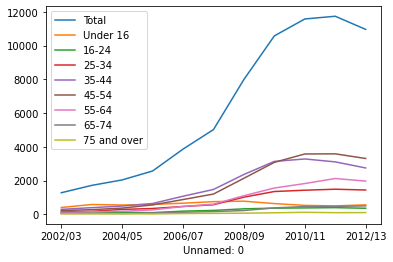

In [95]:
obes_age.plot()

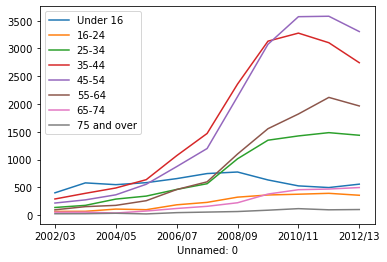

In [96]:
obes_age.drop("Total", axis=1).plot()

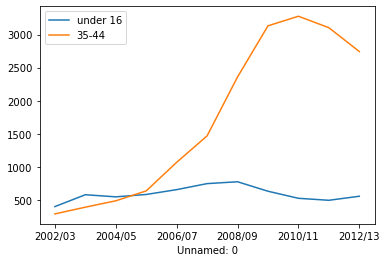

In [99]:
obes_age["Under 16"].plot(label="under 16", legend=True)
obes_age["35-44"].plot(label="35-44", legend=True)

In [100]:
from datetime import datetime

In [102]:
datetime.now().day

8

In [105]:
date_range = pd.date_range(
    start = "1/3/2020",
    end = "1/10/2020",
    freq ="H"
)

In [106]:
date_range

DatetimeIndex(['2020-01-03 00:00:00', '2020-01-03 01:00:00',
               '2020-01-03 02:00:00', '2020-01-03 03:00:00',
               '2020-01-03 04:00:00', '2020-01-03 05:00:00',
               '2020-01-03 06:00:00', '2020-01-03 07:00:00',
               '2020-01-03 08:00:00', '2020-01-03 09:00:00',
               ...
               '2020-01-09 15:00:00', '2020-01-09 16:00:00',
               '2020-01-09 17:00:00', '2020-01-09 18:00:00',
               '2020-01-09 19:00:00', '2020-01-09 20:00:00',
               '2020-01-09 21:00:00', '2020-01-09 22:00:00',
               '2020-01-09 23:00:00', '2020-01-10 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [107]:
df=pd.DataFrame(date_range, columns=["date"])

In [108]:
df

,date
0,2020-01-03 00:00:00
1,2020-01-03 01:00:00
2,2020-01-03 02:00:00
3,2020-01-03 03:00:00
4,2020-01-03 04:00:00
...,...
164,2020-01-09 20:00:00
165,2020-01-09 21:00:00
166,2020-01-09 22:00:00
167,2020-01-09 23:00:00


In [109]:
df["data"]=np.random.randint(0,100,size=(len(date_range)))

In [110]:
df

,date,data
0,2020-01-03 00:00:00,35
1,2020-01-03 01:00:00,20
2,2020-01-03 02:00:00,60
3,2020-01-03 03:00:00,89
4,2020-01-03 04:00:00,77
...,...,...
164,2020-01-09 20:00:00,45
165,2020-01-09 21:00:00,57
166,2020-01-09 22:00:00,50
167,2020-01-09 23:00:00,26


In [116]:
df['daetetime'] = pd.to_datetime(df['date'])

KeyError: 'date'

In [117]:
df

,data,daetetime
date,,
2020-01-03 00:00:00,35,2020-01-03 00:00:00
2020-01-03 01:00:00,20,2020-01-03 01:00:00
2020-01-03 02:00:00,60,2020-01-03 02:00:00
2020-01-03 03:00:00,89,2020-01-03 03:00:00
2020-01-03 04:00:00,77,2020-01-03 04:00:00
...,...,...
2020-01-09 20:00:00,45,2020-01-09 20:00:00
2020-01-09 21:00:00,57,2020-01-09 21:00:00
2020-01-09 22:00:00,50,2020-01-09 22:00:00


In [113]:
df.set_index("date", inplace=True)

In [118]:
df

,data,daetetime
date,,
2020-01-03 00:00:00,35,2020-01-03 00:00:00
2020-01-03 01:00:00,20,2020-01-03 01:00:00
2020-01-03 02:00:00,60,2020-01-03 02:00:00
2020-01-03 03:00:00,89,2020-01-03 03:00:00
2020-01-03 04:00:00,77,2020-01-03 04:00:00
...,...,...
2020-01-09 20:00:00,45,2020-01-09 20:00:00
2020-01-09 21:00:00,57,2020-01-09 21:00:00
2020-01-09 22:00:00,50,2020-01-09 22:00:00


In [123]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',index_col=0,parse_dates=True)

In [124]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [125]:
opsd_daily['Year']=opsd_daily.index.year
opsd_daily['Month']=opsd_daily.index.month
opsd_daily['Weekday']=opsd_daily.index.weekday

In [126]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [127]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   Year         4383 non-null   int64  
 5   Month        4383 non-null   int64  
 6   Weekday      4383 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 273.9 KB


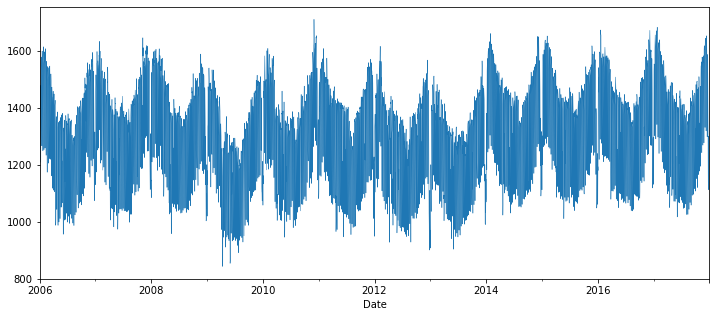

In [130]:
opsd_daily['Consumption'].plot(linewidth=0.5,figsize=(12,5))

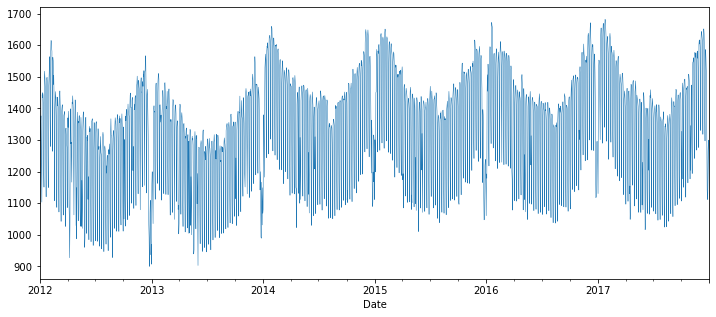

In [134]:
opsd_daily.loc["2012":"2017",'Consumption'].plot(linewidth=0.5,figsize=(12,5))